In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]
print(df.isnull().sum())
df.shape

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


(400, 3)

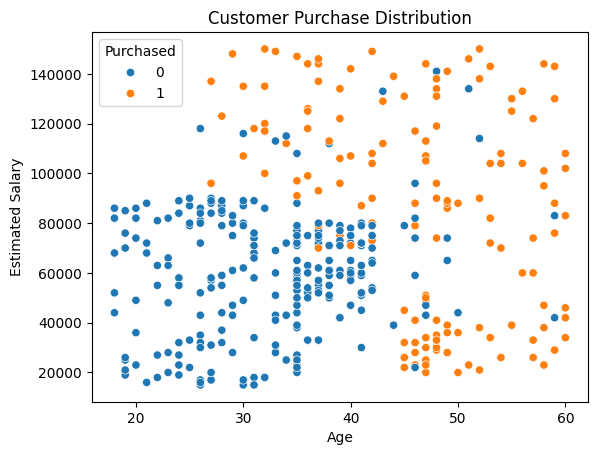

In [ ]:
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased')
plt.title('Customer Purchase Distribution')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

In [ ]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
5,Neural Network,0.9375,0.870968,0.964286,0.915254
2,SVM,0.9250,0.843750,0.964286,0.900000
1,KNN,0.9125,0.862069,0.892857,0.877193
4,Random Forest,0.8875,0.806452,0.892857,0.847458
0,Logistic Regression,0.8625,0.904762,0.678571,0.775510
3,Decision Tree,0.8375,0.777778,0.750000,0.763636


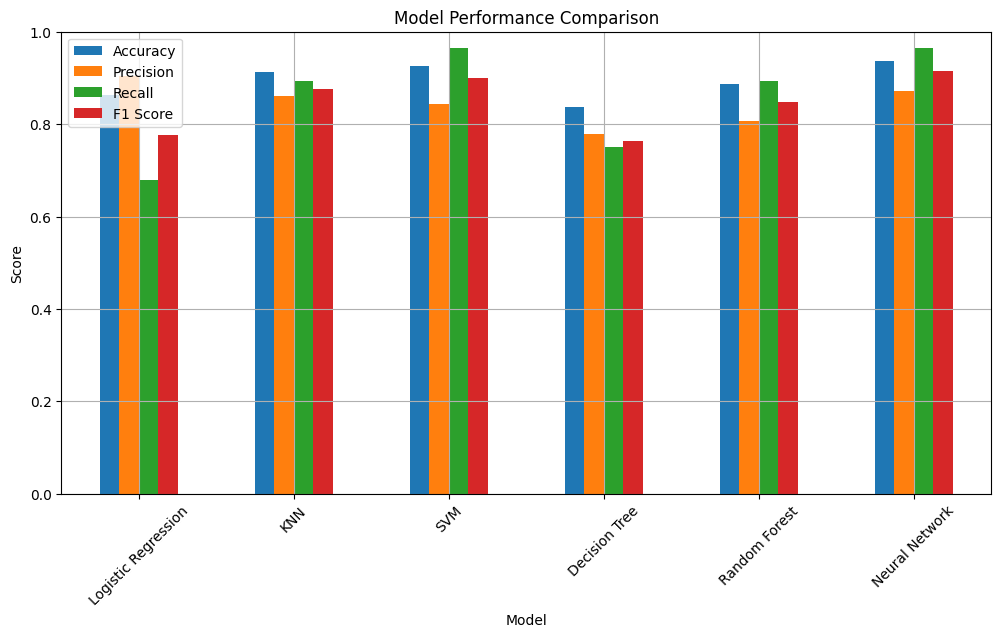

In [ ]:
results_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
model_rf = RandomForestClassifier(random_state=0)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
model_rf.fit(X_train_scaled_df, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
def predict_customer(age, salary):
    input_df = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    scaled = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)
    prediction = model_rf.predict(scaled)

    result = "will purchase insurance ✅" if prediction[0] == 1 else "will not purchase insurance ❌"
    print(f"Prediction for Age={age}, Salary={salary} → {result}")

In [ ]:
predict_customer(30, 87000)

Prediction for Age=30, Salary=87000 → will not purchase insurance ❌


In [ ]:
predict_customer(40, 0)

Prediction for Age=40, Salary=0 → will not purchase insurance ❌


In [ ]:
predict_customer(40, 100000)

Prediction for Age=40, Salary=100000 → will purchase insurance ✅


In [ ]:
predict_customer(50, 0)

Prediction for Age=50, Salary=0 → will purchase insurance ✅


In [ ]:
predict_customer(18, 0)

Prediction for Age=18, Salary=0 → will not purchase insurance ❌


In [ ]:
predict_customer(22, 600000)

Prediction for Age=22, Salary=600000 → will purchase insurance ✅


In [ ]:
predict_customer(35, 2500000)

Prediction for Age=35, Salary=2500000 → will purchase insurance ✅


In [ ]:
predict_customer(60, 100000000)

Prediction for Age=60, Salary=100000000 → will purchase insurance ✅


 Hypothesis 1:
Younger individuals with higher salaries are more likely to purchase health insurance.

In [ ]:
predict_customer(22, 600000)  # young, high salary
predict_customer(22, 10000)   # young, low salary

Prediction for Age=22, Salary=600000 → will purchase insurance ✅
Prediction for Age=22, Salary=10000 → will not purchase insurance ❌


Hypothesis 2:
Older individuals with low salaries are less likely to purchase insurance.

In [ ]:
predict_customer(60, 5000)    # old, low salary
predict_customer(60, 600000)  # old, high salary

Prediction for Age=60, Salary=5000 → will purchase insurance ✅
Prediction for Age=60, Salary=600000 → will purchase insurance ✅


 Hypothesis 3:
Salary has a stronger impact on purchase decision than age.

In [ ]:
predict_customer(40, 10000)     # low salary
predict_customer(40, 90000)     # decent salary
predict_customer(40, 600000)    # very high salary

Prediction for Age=40, Salary=10000 → will not purchase insurance ❌
Prediction for Age=40, Salary=90000 → will purchase insurance ✅
Prediction for Age=40, Salary=600000 → will purchase insurance ✅
